### Первые Шаги

#### Загружаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

#### Загружаем наши данные для станций ПНЗ-1

In [2]:
polluents = {'CO':[2,9,15,50],'NO':[0.04,0.06,0.2,2],'NO2':[0.025,0.06,0.2,2],'SO2':[0.04,0.05,0.15,1],'PM2.5':[0.015,0.035,0.075,0.5],'PM10':[0.045,0.08,0.15,0.6]}
quality = ['Хороший','Нормальный','Плохой','Критический']
kz_standard = pd.DataFrame(polluents, index=quality)
kz_standard

CO    NO    NO2   SO2  PM2.5   PM10
Хороший       2  0.04  0.025  0.04  0.015  0.045
Нормальный    9  0.06  0.060  0.05  0.035  0.080
Плохой       15  0.20  0.200  0.15  0.075  0.150
Критический  50  2.00  2.000  1.00  0.500  0.600

In [4]:
data = pd.read_csv('pnz1_new.csv')
df = data.copy()
print(f'df.shape = {df.shape}')
df.head()

df.shape = (39996, 7)


time      CO      NO     NO2     SO2  PM10  PM2.5
0  15.06.2020 00:20  0,7830  0.0010  0.0009  0.0802   NaN    NaN
1  15.06.2020 00:40  0,5754  0.0010  0.0009  0.1029   NaN    NaN
2  15.06.2020 01:00  1,0051  0.0010  0.0009  0.0428   NaN    NaN
3  15.06.2020 01:20  0,6327  0.0011  0.0010  0.1064   NaN    NaN
4  15.06.2020 01:40  0,4405  0.0010  0.0009  0.1374   NaN    NaN

#### Заменяем запятые на точку для стоблца "CO" так как при копирования с точкой CO 
#### excel автоматический создает дату на некоторых значениях

In [6]:
df['CO'] = df['CO'].str.replace(',','.')

In [7]:
df['CO'][96]

'1.2148'

In [8]:
df.tail(10)

time      CO      NO     NO2     SO2    PM10   PM2.5
39986  31.12.2021 20:40  1.8470  0.1795  0.0886  0.0048  0.0330  0.0204
39987  31.12.2021 21:00  0.8888  0.0948  0.0838  0.0046  0.0188  0.0109
39988  31.12.2021 21:20  0.9042  0.0739  0.0824  0.0055  0.0316  0.0233
39989  31.12.2021 21:40  1.3334  0.1438  0.0885  0.0040  0.0356  0.0248
39990  31.12.2021 22:00  1.4878  0.1365  0.0901  0.0040  0.0421  0.0303
39991  31.12.2021 22:20  2.2613  0.2439  0.0849  0.0031  0.0529  0.0386
39992  31.12.2021 22:40  1.7891  0.1715  0.0876  0.0044  0.0431  0.0327
39993  31.12.2021 23:00  1.6476  0.1748  0.0848  0.0052  0.0398  0.0293
39994  31.12.2021 23:20  1.3716  0.1446  0.0845  0.0049  0.0369  0.0268
39995  31.12.2021 23:40  1.3806  0.1440  0.0824  0.0040  0.0339  0.0256

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    39996 non-null  object 
 1   CO      38844 non-null  object 
 2   NO      39996 non-null  float64
 3   NO2     39996 non-null  float64
 4   SO2     39996 non-null  float64
 5   PM10    38867 non-null  float64
 6   PM2.5   38867 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.1+ MB


#### Заменям dtype object для CO на float

In [10]:
df['CO'] = df['CO'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    39996 non-null  object 
 1   CO      38844 non-null  float64
 2   NO      39996 non-null  float64
 3   NO2     39996 non-null  float64
 4   SO2     39996 non-null  float64
 5   PM10    38867 non-null  float64
 6   PM2.5   38867 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.1+ MB


In [12]:
df.dtypes

time      object
CO       float64
NO       float64
NO2      float64
SO2      float64
PM10     float64
PM2.5    float64
dtype: object

#### Проверяем первую дату и последнию в данном датасете. Дата не корректно отображается

In [13]:
print(f'df.time.min() = {df.time.min()}')
print(f'df.time.max() = {df.time.max()}')

df.time.min() = 01.01.2021 00:00
df.time.max() = 31.12.2021 23:40


#### Исправляем дату превращая стоблец "time" в timestamp формат для удобства

In [14]:
df["time"] = pd.to_datetime(df["time"],errors='coerce',format='%d.%m.%Y %H:%M')

In [15]:
df.head()

time      CO      NO     NO2     SO2  PM10  PM2.5
0 2020-06-15 00:20:00  0.7830  0.0010  0.0009  0.0802   NaN    NaN
1 2020-06-15 00:40:00  0.5754  0.0010  0.0009  0.1029   NaN    NaN
2 2020-06-15 01:00:00  1.0051  0.0010  0.0009  0.0428   NaN    NaN
3 2020-06-15 01:20:00  0.6327  0.0011  0.0010  0.1064   NaN    NaN
4 2020-06-15 01:40:00  0.4405  0.0010  0.0009  0.1374   NaN    NaN

#### Теперь дата верно отображается

In [16]:
print(f'df.time.min() = {df.time.min()}')
print(f'df.time.max() = {df.time.max()}')

df.time.min() = 2020-06-15 00:20:00
df.time.max() = 2021-12-31 23:40:00


In [17]:
df[df["time"] == "16.06.2020 8:20"]

time      CO     NO     NO2     SO2  PM10  PM2.5
96 2020-06-16 08:20:00  1.2148  0.001  0.0009  0.0628   NaN    NaN

#### Земенем индексы на дату

In [18]:
df.set_index('time', inplace=True)

In [19]:
df.head()

CO      NO     NO2     SO2  PM10  PM2.5
time                                                            
2020-06-15 00:20:00  0.7830  0.0010  0.0009  0.0802   NaN    NaN
2020-06-15 00:40:00  0.5754  0.0010  0.0009  0.1029   NaN    NaN
2020-06-15 01:00:00  1.0051  0.0010  0.0009  0.0428   NaN    NaN
2020-06-15 01:20:00  0.6327  0.0011  0.0010  0.1064   NaN    NaN
2020-06-15 01:40:00  0.4405  0.0010  0.0009  0.1374   NaN    NaN

In [20]:
df.index

DatetimeIndex(['2020-06-15 00:20:00', '2020-06-15 00:40:00',
               '2020-06-15 01:00:00', '2020-06-15 01:20:00',
               '2020-06-15 01:40:00', '2020-06-15 02:00:00',
               '2020-06-15 02:20:00', '2020-06-15 02:40:00',
               '2020-06-15 03:00:00', '2020-06-15 03:20:00',
               ...
               '2021-12-31 20:40:00', '2021-12-31 21:00:00',
               '2021-12-31 21:20:00', '2021-12-31 21:40:00',
               '2021-12-31 22:00:00', '2021-12-31 22:20:00',
               '2021-12-31 22:40:00', '2021-12-31 23:00:00',
               '2021-12-31 23:20:00', '2021-12-31 23:40:00'],
              dtype='datetime64[ns]', name='time', length=39996, freq=None)

In [21]:
df.index.max()

Timestamp('2021-12-31 23:40:00')

In [22]:
df.index.min()

Timestamp('2020-06-15 00:20:00')

#### Сколько пропусков в столбцах

In [23]:
df.isna().sum()

CO       1152
NO          0
NO2         0
SO2         0
PM10     1129
PM2.5    1129
dtype: int64

In [24]:
'''
    Отчет по пропущенным значениям
''' 
def nan_in_table(df):
    x = pd.DataFrame()
    x['Всего NaN'] = df.isna().sum()
    x['% NaN'] = round((x['Всего NaN'] / df.shape[0])*100, 2)
    #x= x[x['% NaN'] != 0]   
    if x.shape[0] == 0:
        res = 'Нет отсут-щих значений'
    else:
        res = x.sort_values('% NaN', ascending=False)
    return res

nan_in_table(df)

Всего NaN  % NaN
CO          1152   2.88
PM10        1129   2.82
PM2.5       1129   2.82
NO             0   0.00
NO2            0   0.00
SO2            0   0.00

#### Заполним пропущенные данные средним значением этого столбца. 
#### Это необходимо для прогнозирование, так как некоторые модели машинного обучения 
#### плохо воспринимают пропуски в данных

In [25]:
df['CO'].fillna(value=df['CO'].mean(), inplace=True)
df['PM10'].fillna(value=df['PM10'].mean(), inplace=True)
df['PM2.5'].fillna(value=df['PM2.5'].mean(), inplace=True)

#### Проверяем пропуски

In [26]:
nan_in_table(df)

Всего NaN  % NaN
CO             0    0.0
NO             0    0.0
NO2            0    0.0
SO2            0    0.0
PM10           0    0.0
PM2.5          0    0.0

### Графики

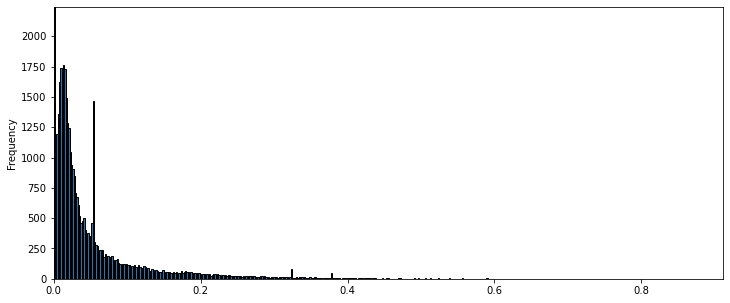

In [27]:
df['PM2.5'].plot.hist(edgecolor='k',bins=500, figsize=(12,5)).autoscale(enable=True, axis='both', tight=True)

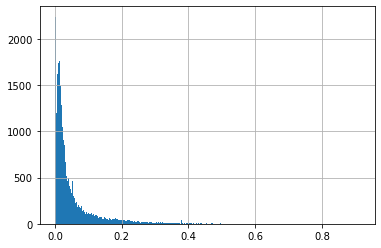

In [28]:
df['PM2.5'].hist(bins=500);

In [29]:
df.columns

Index(['CO', 'NO', 'NO2', 'SO2', 'PM10', 'PM2.5'], dtype='object')

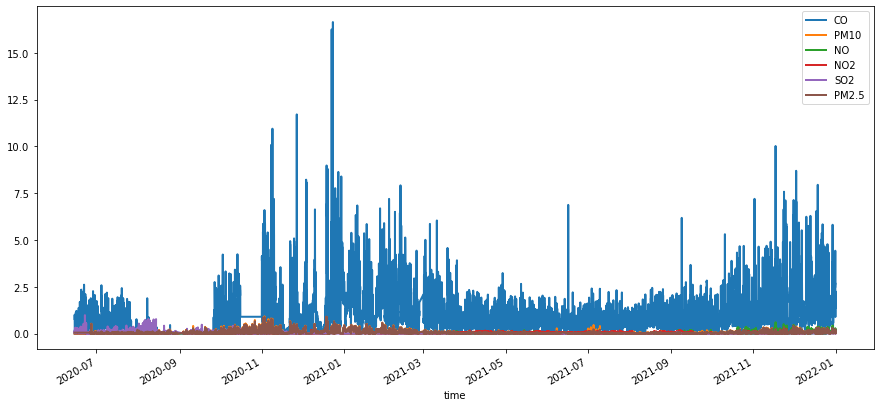

In [30]:
df.plot.line(y=['CO','PM10','NO','NO2','SO2','PM2.5'],figsize=(15,7),lw=2);

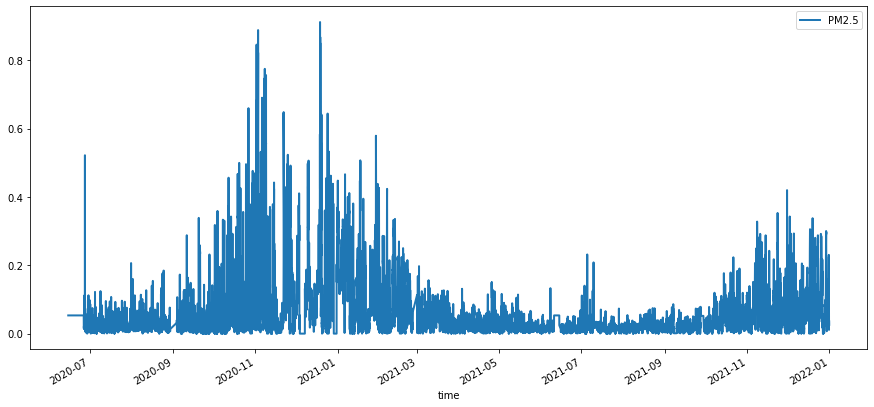

In [32]:
df.plot.line(y=['PM2.5'],figsize=(15,7),lw=2);

#### Посмотрим на матрицу корреляций

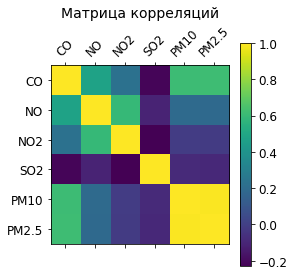

In [33]:
f = plt.figure(figsize=(4, 4))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Матрица корреляций', fontsize=14);

In [34]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

Видно что PM2.5 сильно с коррелировано с PM10, это и понятно. Еще что интересно PM2.5 положительно с коррелирован с CO. Это значит если растет значения CO параллельно растет и PM2.5 и наоборот.

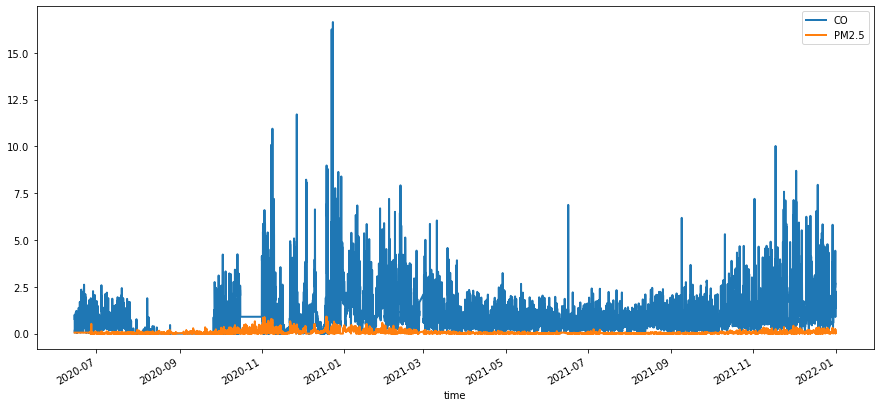

In [35]:
df.plot.line(y=['CO','PM2.5'],figsize=(15,7),lw=2);

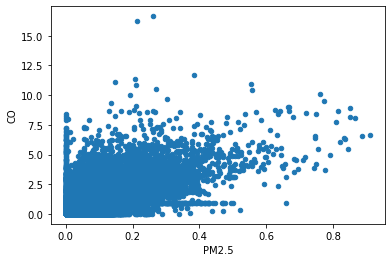

In [36]:
df.plot.scatter(x='PM2.5',y='CO');

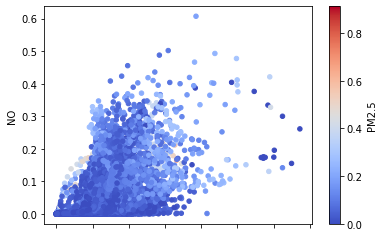

In [37]:
df.plot.scatter(x='NO2',y='NO',c='PM2.5',cmap='coolwarm');

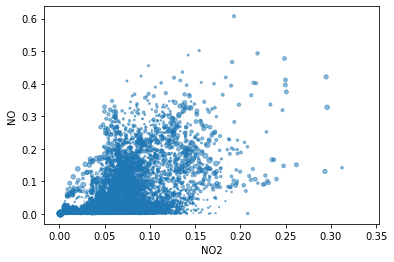

In [38]:
df.plot.scatter(x='NO2',y='NO',s=df['PM2.5']*50,alpha=0.5);

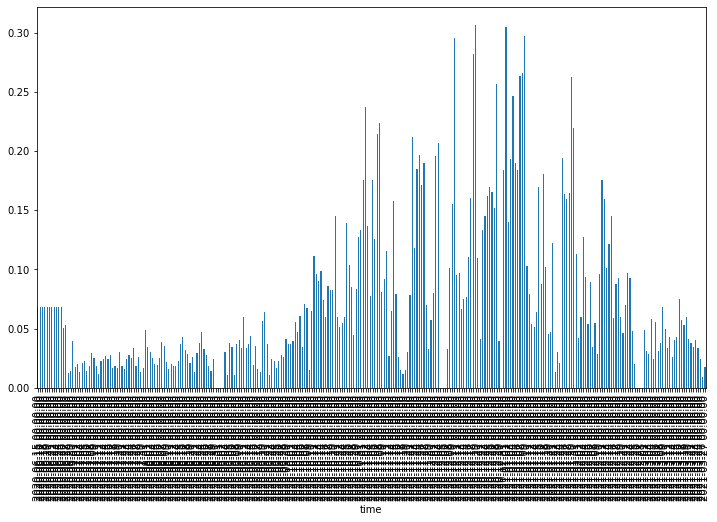

In [49]:
# minutes --> day
df.resample(rule='D').mean()
df['PM2.5'].iloc[0:20000].resample('D').mean().plot.bar(figsize=(12,7));

#### Вывод среднее значения PM2.5 за сутки по всему датасету для сглаживание исходного ряда для выявления трендов

In [39]:
title = 'График PM2.5'
ylabel = 'Ось Y'
xlabel = 'Ось X'

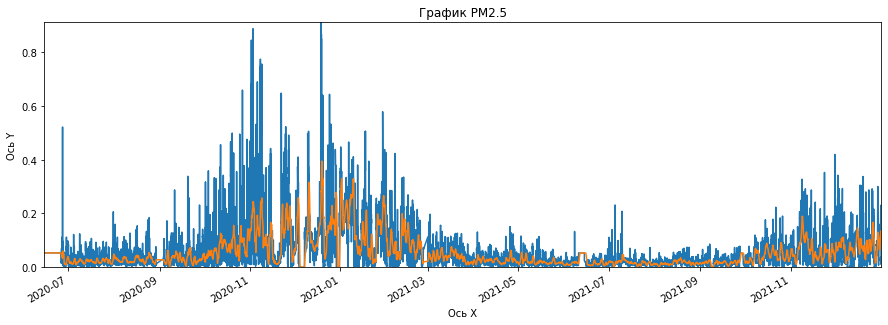

In [40]:
df['PM2.5'].plot(figsize=(12,5))
df.rolling(window=72).mean()['PM2.5'].plot(title=title,ylabel=ylabel,xlabel=xlabel,figsize=(15,5)).autoscale(axis='both',tight=True);

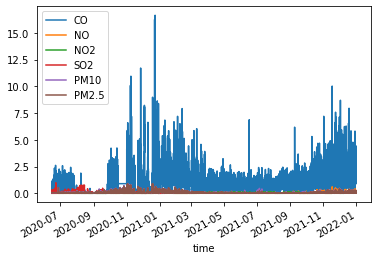

In [41]:
df.plot();

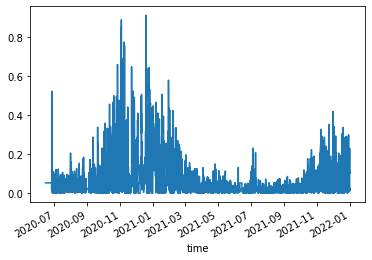

In [42]:
df['PM2.5'].plot();

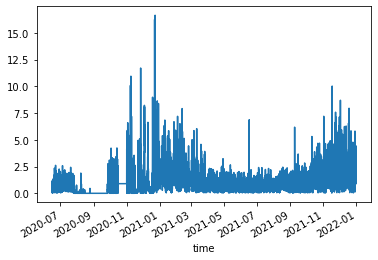

In [43]:
df['CO'].plot();

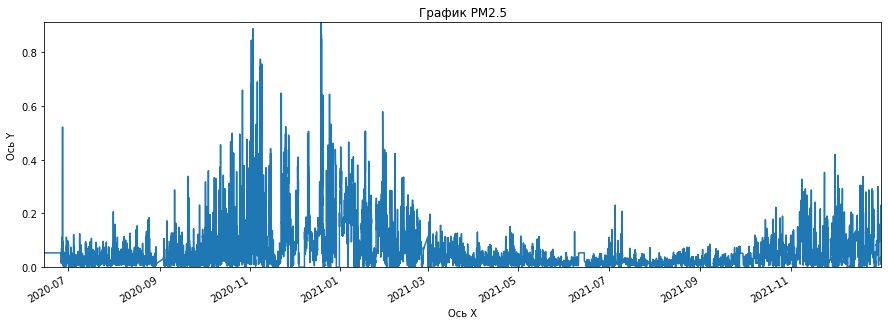

In [44]:
df['PM2.5'].plot(title=title,ylabel=ylabel,xlabel=xlabel,figsize=(15,5)).autoscale(axis='both',tight=True);

#### за 2020 год график по PM2.5

<ipython-input-45-d29f45ae7306>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df['PM2.5']['2020-06-15':'2020-12-31'].plot(title=title,ylabel=ylabel,xlabel=xlabel,figsize=(15,5)).autoscale(axis='both',tight=True);


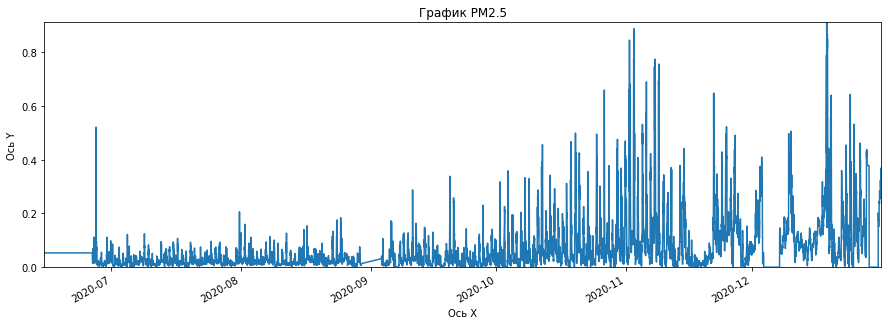

In [45]:
df['PM2.5']['2020-06-15':'2020-12-31'].plot(title=title,ylabel=ylabel,xlabel=xlabel,figsize=(15,5)).autoscale(axis='both',tight=True);

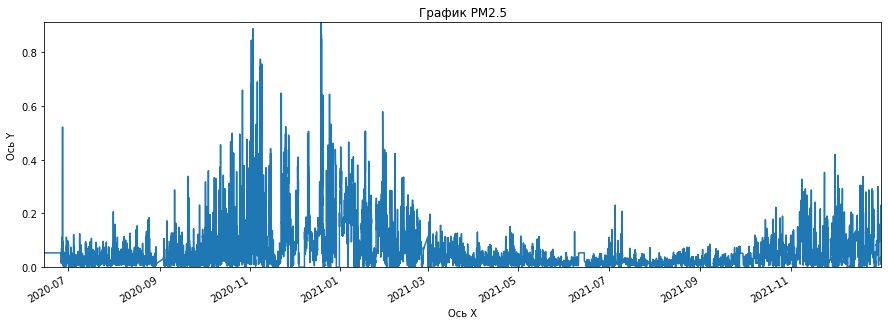

In [46]:
#др вариант такого же графика
df['PM2.5'].plot(title=title,ylabel=ylabel,xlabel=xlabel,figsize=(15,5),xlim=['2020-06-15','2020-12-31']).autoscale(axis='both',tight=True);

In [47]:
from matplotlib import dates

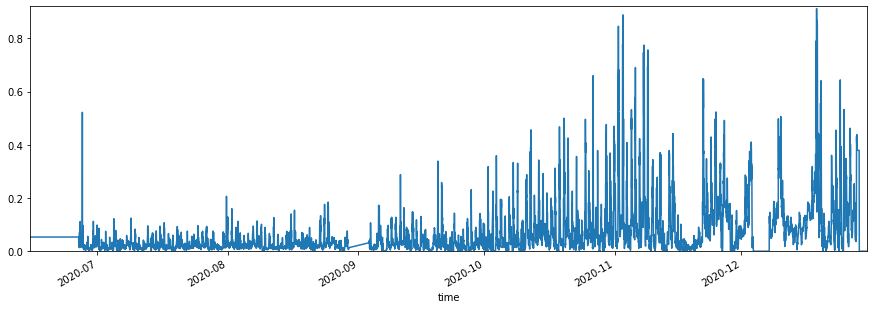

In [48]:
df['PM2.5'].plot(figsize=(15,5),xlim=['2020-06-15','2020-12-31'],ylim=[0,0.92]);

#### Создадим данные по PM2.5 помесячно со средним значением

In [49]:
df_m_pm25 = df['PM2.5'].resample(rule='M').mean()

In [50]:
df_m_pm25.shape

(19,)

In [51]:
df_m_pm25

time
2020-06-30    0.046716
2020-07-31    0.022163
2020-08-31    0.026846
2020-09-30    0.031294
2020-10-31    0.076188
2020-11-30    0.113047
2020-12-31    0.125719
2021-01-31    0.146300
2021-02-28    0.082177
2021-03-31    0.037834
2021-04-30    0.025390
2021-05-31    0.020389
2021-06-30    0.018662
2021-07-31    0.016929
2021-08-31    0.015532
2021-09-30    0.018696
2021-10-31    0.042787
2021-11-30    0.063508
2021-12-31    0.077692
Name: PM2.5, dtype: float64

### Анализ датасета с библиотекой Statsmodels

Фильтр Ходрика-Прескотта разделяет временной ряд 𝑦𝑡 на трендовый компонент 𝜏𝑡 и циклический компонент 𝑐𝑡, 𝑦𝑡=𝜏𝑡+𝑐𝑡 Компоненты определяются путем минимизации следующей квадратичной функции потерь, где 𝜆 - параметр сглаживания:

min𝜏𝑡∑𝑇𝑡=1𝑐2𝑡+𝜆∑𝑇𝑡=1[(𝜏𝑡-𝜏𝑡-1)-(𝜏𝑡-1-𝜏𝑡-2)]2 Значение 𝜆, указанное выше, учитывает колебания в темпах роста трендового компонента. При анализе квартальных данных рекомендуется использовать значение лямбда по умолчанию 1600. Для годовых данных используйте 6,25, а для ежемесячных - 129600.

In [52]:
from statsmodels.tsa.filters.hp_filter import hpfilter
pm25_cycle, pm25_trend = hpfilter(df_m_pm25,lamb=129600)

#### Здесь видно общий тренд по увеличению частиц PM2.5 по всему датасету

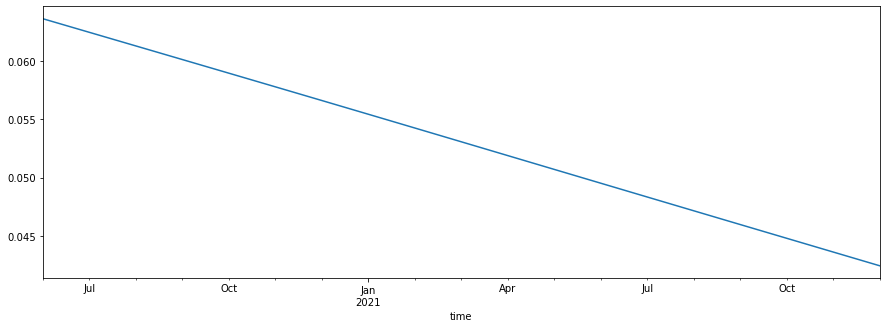

In [53]:
pm25_trend.plot(figsize=(15,5));

#### Здесь видно цикличность. В зимнее время видна сезонность по увеличению частиц PM2.5

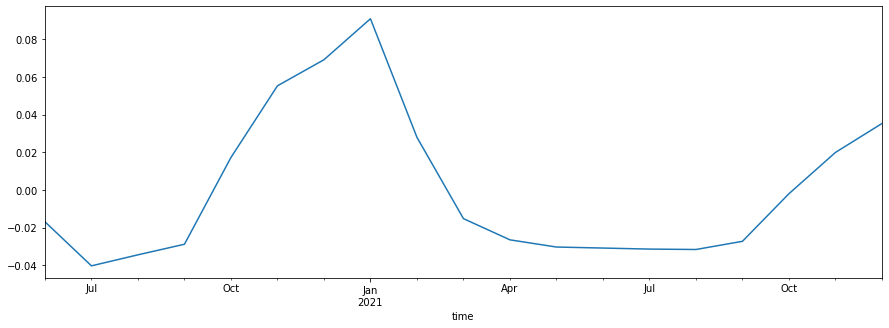

In [54]:
pm25_cycle.plot(figsize=(15,5));

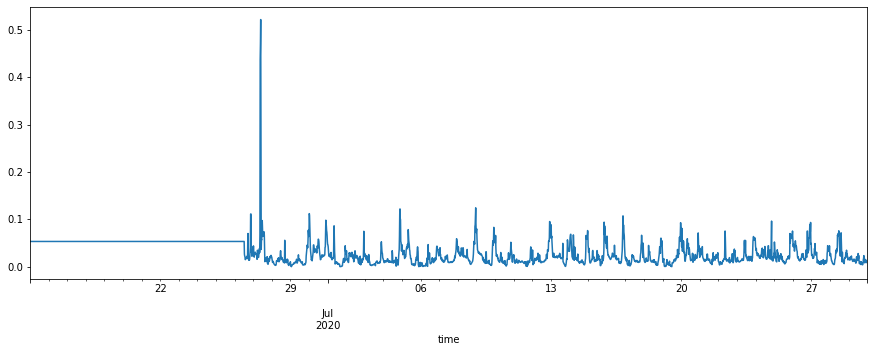

In [55]:
df['PM2.5']['2020-06-15 00:20:00':'2020-07-30 00:0:00'].plot(figsize=(15,5));

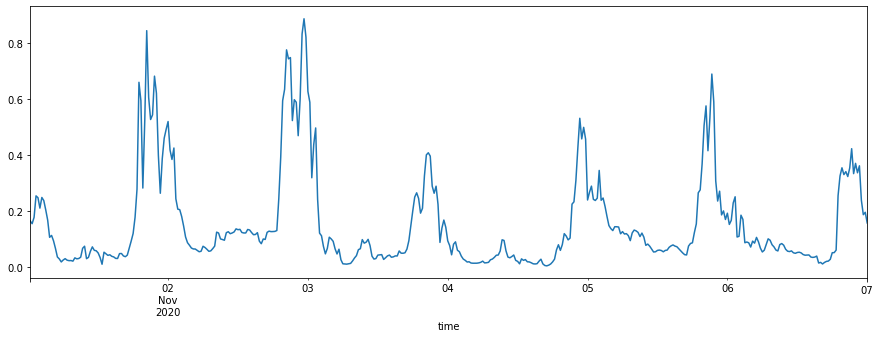

In [57]:
df['PM2.5']['2020-11-01 00:20:00':'2020-11-07 00:0:00'].plot(figsize=(15,5));

#### Дата инжиниринг

In [58]:
'''
    Отчет по пропущенным значениям
''' 
nan_in_table(df)

Всего NaN  % NaN
CO             0    0.0
NO             0    0.0
NO2            0    0.0
SO2            0    0.0
PM10           0    0.0
PM2.5          0    0.0

#### Передискретизируем по времени преобразования частоты по часам, так как датасет был в минутах с интервалом по 20мин

In [59]:
df.resample(rule='H').mean()
res_dfh = df['PM2.5'].resample('H').mean()

In [60]:
res_dfh.shape

(13560,)

In [61]:
res_dfh.index.freq = 'H'

In [62]:
res_dfh.index

DatetimeIndex(['2020-06-15 00:00:00', '2020-06-15 01:00:00',
               '2020-06-15 02:00:00', '2020-06-15 03:00:00',
               '2020-06-15 04:00:00', '2020-06-15 05:00:00',
               '2020-06-15 06:00:00', '2020-06-15 07:00:00',
               '2020-06-15 08:00:00', '2020-06-15 09:00:00',
               ...
               '2021-12-31 14:00:00', '2021-12-31 15:00:00',
               '2021-12-31 16:00:00', '2021-12-31 17:00:00',
               '2021-12-31 18:00:00', '2021-12-31 19:00:00',
               '2021-12-31 20:00:00', '2021-12-31 21:00:00',
               '2021-12-31 22:00:00', '2021-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=13560, freq='H')

In [63]:
df.resample(rule='D').mean()
resample_df_day = df['PM2.5'].resample('D').mean()

In [64]:
resample_df_day.shape

(565,)

In [65]:
resample_df_day.index

DatetimeIndex(['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
               '2020-06-23', '2020-06-24',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='time', length=565, freq=None)

In [66]:
resample_df_day.index.freq = 'D'

In [67]:
resample_df_day.index

DatetimeIndex(['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
               '2020-06-23', '2020-06-24',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='time', length=565, freq='D')

#### Прогнозирование начало

In [68]:
len(resample_df_day)

565

In [69]:
resample_df_day = resample_df_day.to_frame('PM2.5')

In [70]:
resample_df_day.head()

PM2.5
time                
2020-06-15  0.053286
2020-06-16  0.053286
2020-06-17  0.053286
2020-06-18  0.053286
2020-06-19  0.053286

In [71]:
resample_df_day.index.max()

Timestamp('2021-12-31 00:00:00', freq='D')

In [72]:
resample_df_day.index.min()

Timestamp('2020-06-15 00:00:00', freq='D')

In [73]:
resample_df_day.isnull().sum()

PM2.5    7
dtype: int64

In [74]:
resample_df_day.dropna(inplace=True)

In [75]:
resample_df_day.isnull().sum()

PM2.5    0
dtype: int64

In [76]:
(resample_df_day >= 0).all(1)

time
2020-06-15    True
2020-06-16    True
2020-06-17    True
2020-06-18    True
2020-06-19    True
              ... 
2021-12-27    True
2021-12-28    True
2021-12-29    True
2021-12-30    True
2021-12-31    True
Length: 558, dtype: bool

In [77]:
resample_df_day = resample_df_day[(resample_df_day > 0)]

In [78]:
resample_df_day.shape

(558, 1)

In [79]:
# нету PM2.5 название колонки
resample_df_day.head()

PM2.5
time                
2020-06-15  0.053286
2020-06-16  0.053286
2020-06-17  0.053286
2020-06-18  0.053286
2020-06-19  0.053286

In [80]:
train = resample_df_day.iloc[:450]
test = resample_df_day.iloc[450:]

In [81]:
train.shape

(450, 1)

In [82]:
test.shape

(108, 1)

In [83]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [84]:
fitted_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()

C:\Users\daur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\daur\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\daur\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [85]:
test_pred = fitted_model.forecast(2)

C:\Users\daur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [86]:
train

PM2.5
time                
2020-06-15  0.053286
2020-06-16  0.053286
2020-06-17  0.053286
2020-06-18  0.053286
2020-06-19  0.053286
...              ...
2021-09-10  0.015761
2021-09-11  0.024694
2021-09-12  0.013389
2021-09-13  0.017007
2021-09-14  0.016142

[450 rows x 1 columns]

In [87]:
test_pred

450   NaN
451   NaN
dtype: float64

In [88]:
test_pred.isnull().sum()

2

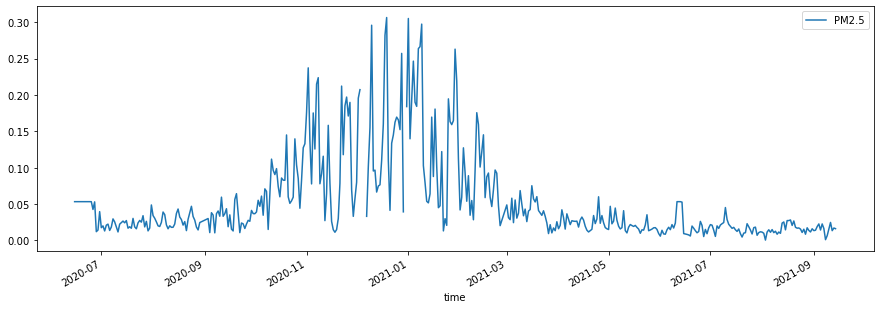

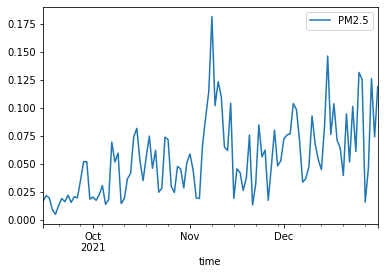

In [89]:
train.plot(legend=True,label='Train', figsize=(15,5))
test.plot(legend=True,label='Test');

TypeError: index type not supported

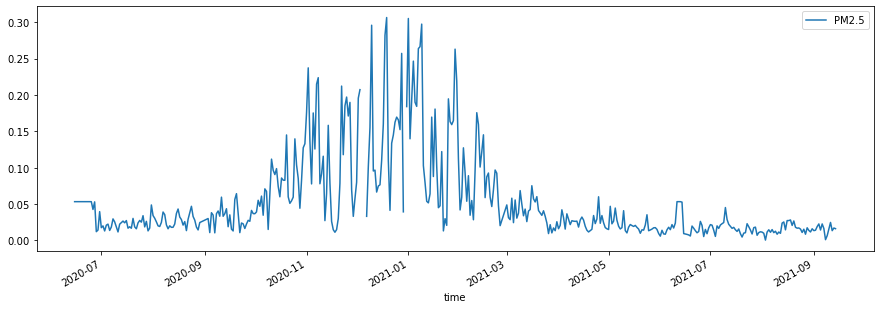

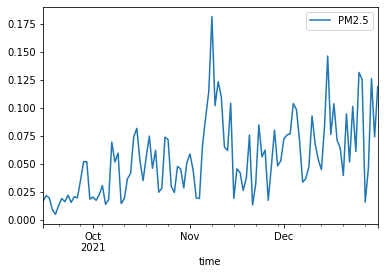

In [90]:
train.plot(legend=True,label='Train', figsize=(15,5))
test.plot(legend=True,label='Test')
test_pred.plot(legend=True,label='Test_pred');

#### Тест Дики-Фулера

In [91]:
pd.options.display.float_format = '{:.2f}'.format

In [92]:
from statsmodels.tsa.stattools import adfuller

In [93]:
adfuller(df['PM2.5'])

(-11.314489243392305,
 1.216079676832001e-20,
 54,
 39941,
 {'1%': -3.4305137345164036,
  '5%': -2.8616123668919524,
  '10%': -2.5668085185731138},
 -204544.51638337626)

In [111]:
#help(adfuller)

In [94]:
dftest = adfuller(df['PM2.5'])
dfout = pd.Series(dftest[0:4],index=['ADF статистика теста', 'p-значение', 'Номер задержки', 'Номер наблюдение'])

In [95]:
for key,val in dftest[4].items():
    dfout[f'критическое значение ({key})'] = val

In [96]:
dfout

ADF статистика теста           -11.31
p-значение                       0.00
Номер задержки                  54.00
Номер наблюдение             39941.00
критическое значение (1%)       -3.43
критическое значение (5%)       -2.86
критическое значение (10%)      -2.57
dtype: float64

In [97]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF статистика теста', 'p-значение', 'Номер задержки', 'Номер наблюдение']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'критическое значение ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Сильное доказательство против нулевой гипотезы")
        print("Отклонить нулевую гипотезу")
        print("Данные являются стационарными")
    else:
        print("Слабые доказательства против нулевой гипотезы")
        print("Не удается отвергнуть нулевую гипотезу")
        print("Данные являются нестационарными")

In [98]:
adf_test(df['PM2.5'])

Augmented Dickey-Fuller Test: 
ADF статистика теста           -11.31
p-значение                       0.00
Номер задержки                  54.00
Номер наблюдение             39941.00
критическое значение (1%)       -3.43
критическое значение (5%)       -2.86
критическое значение (10%)      -2.57
Сильное доказательство против нулевой гипотезы
Отклонить нулевую гипотезу
Данные являются стационарными


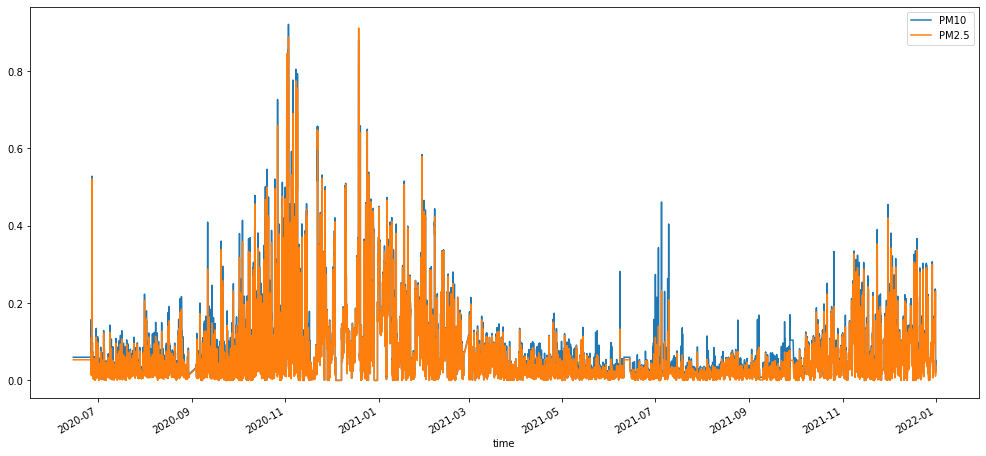

In [99]:
df['PM10'].plot(figsize=(17,8),legend=True)
df['PM2.5'].plot(legend=True);

In [118]:
from statsmodels.tsa.stattools import grangercausalitytests

In [119]:
grangercausalitytests(df[['PM10','PM2.5']],maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=92.8980 , p=0.0000  , df_denom=22465, df_num=1
ssr based chi2 test:   chi2=92.9104 , p=0.0000  , df=1
likelihood ratio test: chi2=92.7188 , p=0.0000  , df=1
parameter F test:         F=92.8980 , p=0.0000  , df_denom=22465, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=112.3596, p=0.0000  , df_denom=22462, df_num=2
ssr based chi2 test:   chi2=224.7693, p=0.0000  , df=2
likelihood ratio test: chi2=223.6524, p=0.0000  , df=2
parameter F test:         F=112.3596, p=0.0000  , df_denom=22462, df_num=2


{1: ({'ssr_ftest': (92.89798265398807, 6.0719337202634435e-22, 22465.0, 1),
   'ssr_chi2test': (92.91038834942371, 5.471654496982316e-22, 1),
   'lrtest': (92.71881330918404, 6.027784088643286e-22, 1),
   'params_ftest': (92.89798265398026, 6.071933720287906e-22, 22465.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (112.3596175384204, 2.7881480011962556e-49, 22462.0, 2),
   'ssr_chi2test': (224.7692571663869, 1.5558794889793506e-49, 2),
   'lrtest': (223.65235748534906, 2.719616326796481e-49, 2),
   'params_ftest': (112.3596175384211, 2.7881480011962556e-49, 22462.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

### Выбор метрики качество

In [100]:
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [101]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

In [102]:
df.index

DatetimeIndex(['2020-06-15 00:20:00', '2020-06-15 00:40:00',
               '2020-06-15 01:00:00', '2020-06-15 01:20:00',
               '2020-06-15 01:40:00', '2020-06-15 02:00:00',
               '2020-06-15 02:20:00', '2020-06-15 02:40:00',
               '2020-06-15 03:00:00', '2020-06-15 03:20:00',
               ...
               '2021-12-31 20:40:00', '2021-12-31 21:00:00',
               '2021-12-31 21:20:00', '2021-12-31 21:40:00',
               '2021-12-31 22:00:00', '2021-12-31 22:20:00',
               '2021-12-31 22:40:00', '2021-12-31 23:00:00',
               '2021-12-31 23:20:00', '2021-12-31 23:40:00'],
              dtype='datetime64[ns]', name='time', length=39996, freq=None)

In [103]:
df.shape

(39996, 6)

In [104]:
df_m_pm25 = df['PM2.5'].resample(rule='M').mean()
df_q_pm25 = df['PM2.5'].resample(rule='Q').mean()

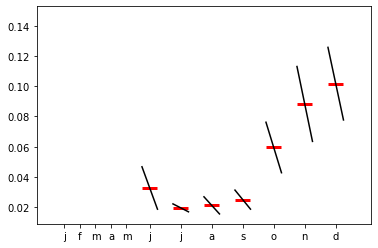

In [105]:
month_plot(df_m_pm25);

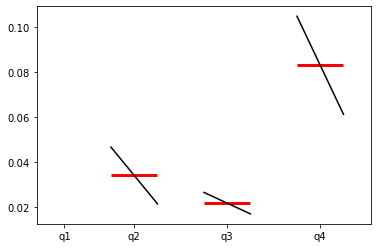

In [106]:
quarter_plot(df_q_pm25);

### ARIMA

In [ ]:
# !pip install pmdarima

In [107]:
from pmdarima import auto_arima

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# help(auto_arima)

In [109]:
stepwise_fit = auto_arima(df['PM2.5'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-202057.526, Time=4.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-202706.824, Time=5.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-202876.260, Time=11.84 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-202059.526, Time=2.77 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-202986.496, Time=8.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-203310.534, Time=13.86 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-203295.182, Time=4.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-203338.224, Time=7.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-203331.669, Time=4.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-203417.137, Time=17.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-203404.128, Time=6.64 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-203533.529, Time=11.48 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-203533.354, Time=6.33 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-203531.849, T

In [110]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                39996
Model:               SARIMAX(6, 1, 0)   Log Likelihood              101775.767
Date:                Wed, 23 Feb 2022   AIC                        -203537.534
Time:                        22:37:00   BIC                        -203477.359
Sample:                             0   HQIC                       -203518.487
                              - 39996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1431      0.001    163.313      0.000       0.141       0.145
ar.L2         -0.1142      0.001   -119.197      0.000      -0.116      -0.112
ar.L3         -0.0429      0.001    -45.854      0.000      -0.045      -0.041
ar.L4          0.0523      0.001     55.167      0.000       0.050       0.054
ar.L5         -0.0587      0.001    -61.871      0.000      -0.061      -0.057
ar.L6          0.0102      0.001      8.094      0.000       0.008       0.013
sigma2         0.0004   3.84e-07    940.524      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          42622081.23
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                             1.89
Prob(H) (two-sided):                  0.00   Kurtosis:                       162.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
stepwise_fit_seaonal = auto_arima(df['PM2.5'],start_p=0,start_q=0,max_p=4,max_q=4,seasonal=True,trace=True,m=1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-103564.277, Time=7.89 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-103891.684, Time=5.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-103985.260, Time=39.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-103566.277, Time=3.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-104053.479, Time=16.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-104284.278, Time=34.92 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-104265.302, Time=5.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-104302.664, Time=21.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-104297.928, Time=6.95 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-104363.557, Time=30.60 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-104354.934, Time=19.87 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-104385.150, Time=104.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-104335.378, Time=81.74 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-104451.8

In [42]:
stepwise_fit_seaonal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                22469
Model:               SARIMAX(3, 1, 4)   Log Likelihood               52238.653
Date:                Thu, 27 Jan 2022   AIC                        -104461.306
Time:                        22:33:38   BIC                        -104397.147
Sample:                             0   HQIC                       -104440.432
                              - 22469                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1467      0.036     -4.086      0.000      -0.217      -0.076
ar.L2          0.2458      0.020     12.333      0.000       0.207       0.285
ar.L3          0.2823      0.012     22.873      0.000       0.258       0.307
ma.L1          0.2817      0.036      7.876      0.000       0.212       0.352
ma.L2         -0.3268      0.023    -14.087      0.000      -0.372      -0.281
ma.L3         -0.4136      0.013    -31.825      0.000      -0.439      -0.388
ma.L4          0.0135      0.006      2.446      0.014       0.003       0.024
sigma2         0.0006   9.33e-07    599.391      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):          12327005.44
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             1.85
Prob(H) (two-sided):                  0.00   Kurtosis:                       117.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
stepwise_fit_seaonal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                22469
Model:               SARIMAX(3, 1, 4)   Log Likelihood               52238.653
Date:                Thu, 27 Jan 2022   AIC                        -104461.306
Time:                        22:33:39   BIC                        -104397.147
Sample:                             0   HQIC                       -104440.432
                              - 22469                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1467      0.036     -4.086      0.000      -0.217      -0.076
ar.L2          0.2458      0.020     12.333      0.000       0.207       0.285
ar.L3          0.2823      0.012     22.873      0.000       0.258       0.307
ma.L1          0.2817      0.036      7.876      0.000       0.212       0.352
ma.L2         -0.3268      0.023    -14.087      0.000      -0.372      -0.281
ma.L3         -0.4136      0.013    -31.825      0.000      -0.439      -0.388
ma.L4          0.0135      0.006      2.446      0.014       0.003       0.024
sigma2         0.0006   9.33e-07    599.391      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):          12327005.44
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             1.85
Prob(H) (two-sided):                  0.00   Kurtosis:                       117.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [46]:
from pmdarima import auto_arima

### ARMA

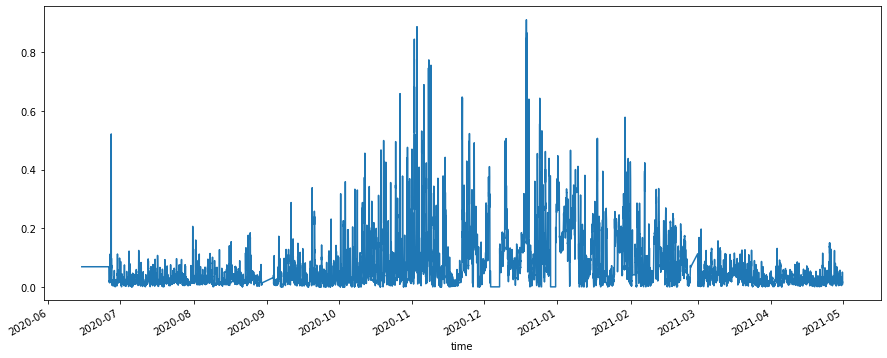

In [47]:
df['PM2.5'].plot(figsize=(15,6));

In [51]:
adf_test(df['PM2.5'])

Augmented Dickey-Fuller Test: 
ADF статистика теста         -1.129432e+01
p-значение                    1.355510e-20
Номер задержки                4.700000e+01
Номер наблюдение              2.242100e+04
критическое значение (1%)    -3.430642e+00
критическое значение (5%)    -2.861669e+00
критическое значение (10%)   -2.566839e+00
Сильное доказательство против нулевой гипотезы
Отклонить нулевую гипотезу
Данные являются стационарными


In [ ]:
auto_arima(df['PM2.5'],seasonal=False).summary()

In [ ]:
len(df['PM2.5'])

In [ ]:
train = df.iloc[:18000]
test = df.iloc[18000:]

In [ ]:
model = ARMA(train['PM2.5'], order=(5, 1))

In [ ]:
result = model.fit()

In [ ]:
result.summary()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
predictions = result.predict(start,end).rename('ARMA (5,1) Предсказание')

In [ ]:
predictions

In [ ]:
test['PM2.5'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True);

In [ ]:
test['PM2.5'].mean()

In [ ]:
predictions.mean()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resample_df_day = df['PM2.5'].resample('D').mean()

In [ ]:
resample_df_day.index.freq = 'D'

In [ ]:
resample_df_day.index

In [ ]:
res = seasonal_decompose(resample_df_day,model='multiplicative')
res.plot();

In [ ]:
plot_acf(resample_df_day);

In [ ]:
plot_pacf(resample_df_day);

### LSTM

In [54]:
# !pip install keras

In [55]:
# !pip install tensorflow

In [111]:
import keras

In [112]:
len(df) - 72

39924

In [113]:
train = df['PM2.5'].iloc[:39924].values
test = df['PM2.5'].iloc[39924:].values

In [114]:
train= train.reshape(-1, 1)
test = test.reshape(-1, 1)

In [115]:
print(train.shape)
print(test.shape)

(39924, 1)
(72, 1)


In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler()

In [118]:
scaler.fit(train)

MinMaxScaler()

In [119]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [120]:
scaled_train

array([[0.05845315],
       [0.05845315],
       [0.05845315],
       ...,
       [0.12011847],
       [0.11265906],
       [0.10849057]])

In [121]:
scaled_test

array([[0.10596753],
       [0.10618692],
       [0.11573058],
       [0.12220272],
       [0.12626152],
       [0.12746819],
       [0.12143484],
       [0.12110575],
       [0.12198333],
       [0.12066696],
       [0.11814392],
       [0.11726634],
       [0.1192409 ],
       [0.12011847],
       [0.12275121],
       [0.12154454],
       [0.11956999],
       [0.1189118 ],
       [0.11836332],
       [0.11726634],
       [0.11682756],
       [0.11682756],
       [0.11463361],
       [0.11287846],
       [0.11397543],
       [0.11573058],
       [0.11551119],
       [0.11419482],
       [0.11068451],
       [0.11386573],
       [0.11792453],
       [0.1230803 ],
       [0.13207547],
       [0.13053971],
       [0.13339184],
       [0.13240456],
       [0.14063186],
       [0.14842036],
       [0.15423431],
       [0.15587977],
       [0.16750768],
       [0.17529618],
       [0.186595  ],
       [0.19701624],
       [0.19964897],
       [0.20952172],
       [0.21138657],
       [0.211

In [122]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [123]:
n_input = 2
n_features = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [124]:
len(scaled_train)

39924

In [125]:
len(generator)

39922

In [126]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [127]:
n_input = 72
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [130]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [131]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping

In [132]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=70, batch_size=1)

In [ ]:
model.fit_generator(train_generator,epochs=12)

Epoch 1/12
39852/39852 [==============================] - 818s 20ms/step - loss: 6.1272e-04
Epoch 2/12
39852/39852 [==============================] - 881s 22ms/step - loss: 4.7759e-04
Epoch 3/12
39852/39852 [==============================] - 891s 22ms/step - loss: 4.6043e-04
Epoch 4/12
39852/39852 [==============================] - 864s 22ms/step - loss: 4.5709e-04
Epoch 5/12
18747/39852 [=============>................] - ETA: 7:21 - loss: 4.0283e-04

In [48]:
model.history.history.keys()

dict_keys(['loss'])

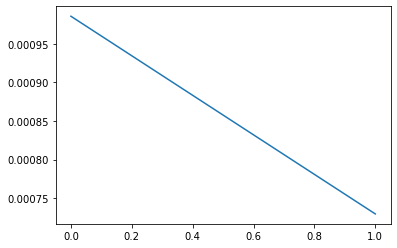

In [50]:
my_loss = model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)